In [4]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

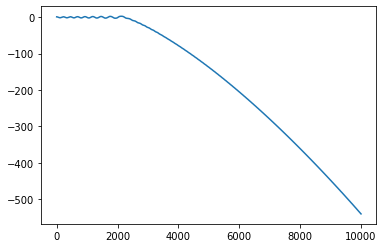

In [5]:
# dynamics simulation 

def get_force(angle, mass): return mass * -9.81 * np.sin(angle)
# game loop implementation

# system parameters
pendulum_mass = 0.7  #kg
pendulum_string_length = 0.1 #m

# step
dt = 0.01

# system state (incl. initial conditions)
pendulum_angle = 1.2
pendulum_angular_velocity = 0

result = []

# step between 0s and 10s every dt seconds
for step in np.arange(0.0, 100.0, dt):
    # get acceleration
    # F = m*a  ->  a = F/m
    acceleration = get_force(pendulum_angle, pendulum_mass) / pendulum_mass
    
    # do the time step
    pendulum_angle += pendulum_angular_velocity * dt
    pendulum_angular_velocity += acceleration * dt
    result.append(pendulum_angle)
    
plt.plot(result)
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1214
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.01067911,  0.07352685,  0.13637459,  0.19532061,
        0.25365845,  0.31671692,  0.37902176,  0.44132661,  0.50006441,
        0.55854994,  0.62236933,  0.68197275,  0.74157616,  0.80013593,
        0.85870892,  0.92287752,  0.98157065,  1.04026378,  1.09889744,
        1.15740865,  1.22134625,  1.28033824,  1.33933024,  1.39789493,
        1.45645209,  1.52054807,  1.57954004,  1.63853201,  1.69716694,
        1.75568212,  1.81963888,  1.8785141 ,  1.93738931,  1.99595593,
        2.05450915,  2.11858709,  2.1776907 ,  2.2367943 ,  2.29542721,
        2.35394607,  2.4179204 ,  2.47668805,  2.53545571,  2.59402413,
        2.65257371,  2.71663495,  2.77583744,  2.83503992,  2.89367124,
        2.95219319,  3.01618224,  3.07486687,  3.1335515 ,  3.19212101,
        3.25066808,  3.31471

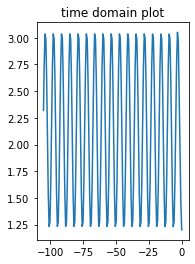

In [7]:
# battle plan: formulate system as a continuous-time model -> pass it to a differential equation solver

# this function needs to return dy/dt
# variable naming convention from control theory:
# y -> system state vector (sometimes 'u')
# t -> time
# p -> parameter vector
def model(t, y, p=()):
    pendulum_angle = y[0]
    pendulum_anglular_velocity = y[1]
    
    acceleration = get_force(pendulum_angle, pendulum_mass) / pendulum_mass
    
    return [pendulum_angular_velocity, acceleration]
# initial condition
y0 = [0,1.2]

# time points
time_span = (0.0, 10.0)

# solve ODEs
result = solve_ivp(model, time_span, y0, method='RK45', rtol=1e-8)

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 2, 2)
ax.plot(result.y[0, :],
        result.y[1, :])
ax.set_title("time domain plot")
result